In [1]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
df = pd.read_csv('키와몸무게.csv',encoding='cp949')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [2]:
# pandas를 통해 데이터를 확인합니다.

# 파운드로 적혀 있는 무게 값을 KG 단위로 변환합니다.
# 1 파운드 = 0.45359237kg
df['Weight'] = df['Weight'] * 0.45359237

# inch로 적혀 있는 키 값을 cm 단위로 변환합니다.
# 1 inch = 2.54cm
df['Height'] = df['Height'] * 2.54

df

,Gender,Height,Weight
0,Male,187.571423,109.721075
1,Male,174.706036,73.622792
2,Male,188.239668,96.497629
3,Male,182.196685,99.809586
4,Male,177.499761,93.598695
...,...,...,...
9995,Female,168.078536,62.041210
9996,Female,170.350573,77.504378
9997,Female,162.224700,58.275424
9998,Female,175.346978,74.322226


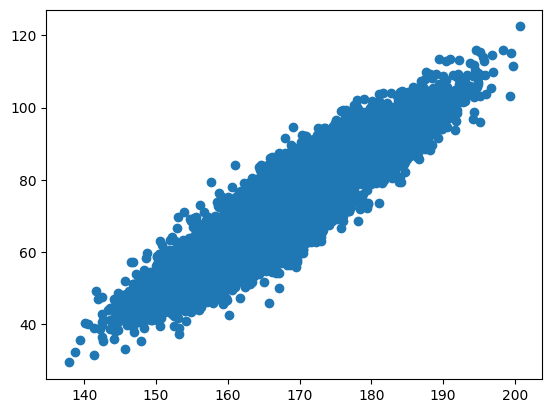

In [3]:
import matplotlib.pyplot as plt

# 키와 몸무게에 관한 산점도를 그렵봅니다.
# 산점도가 직선의 방향성을 지니고 있을 때, 선형회귀를 사용합니다.
키 = df["Height"]
몸무게 = df["Weight"]
plt.plot(키, 몸무게, 'o')
plt.show()

In [4]:
# 선형회귀 모델을 통한 학습을 진행합니다.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(키.values.reshape(-1,1), 몸무게)

LinearRegression()

In [5]:
# 학습한 내용을 바탕으로 예측합니다.

lr.predict([[170]])

array([75.19390579])

In [6]:
# 회귀식의 기울기와 절편을 구합니다
# 기울기 : coef_,  절편 : intercept_
print('기울기:',lr.coef_ , '절편:', lr.intercept_)

기울기: [1.37815071] 절편: -159.09171408121213


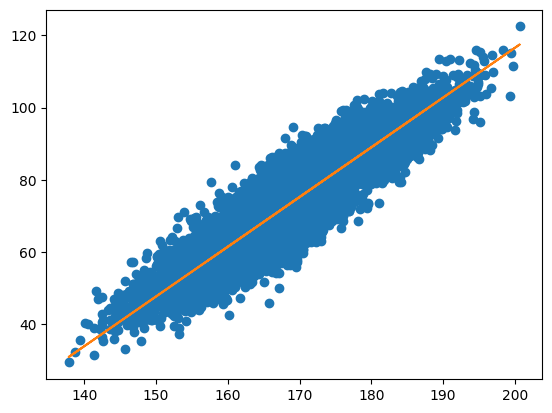

In [7]:
# 예측값 그래프 그리기
plt.plot(키, 몸무게, 'o')
plt.plot(키,lr.predict(키.values.reshape(-1,1)))
plt.show()

In [8]:
#case 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# train, test 분리를 위해 numpy배열로 변환
data = df['Height'].to_numpy()
target = df['Weight'].to_numpy()

# train, test 분리
훈련용_data , 테스트용_data , 훈련용_target , 테스트용_target = train_test_split(
    data , target , test_size=0.2 , random_state=40)


# 행(row)으로 나열된 데이터를 열(column) 단위로 변경
훈련용_data = 훈련용_data.reshape(-1,1)
테스트용_data = 테스트용_data.reshape(-1,1)

In [9]:
# 선형회귀모델 학습

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(훈련용_data , 훈련용_target)

# [170] 데이터 넣어서 예측값 확인하기
lr.predict([[170]])

array([75.22310699])

In [13]:
# score 확인
print(lr.score(훈련용_data , 훈련용_target))
print(lr.score(테스트용_data , 테스트용_target))

0.8564097769459904
0.850138541847046


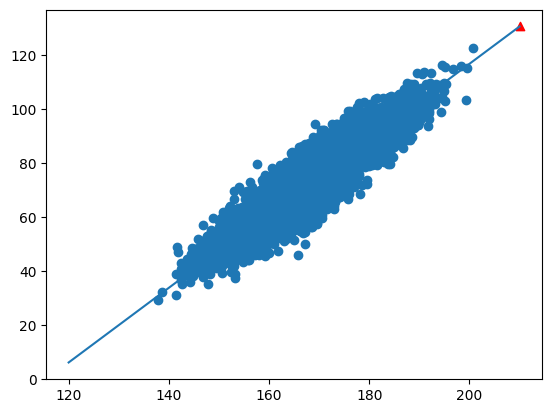

In [11]:
# 예측 그래프 그리기
import matplotlib.pyplot as plt
plt.scatter(훈련용_data , 훈련용_target)
plt.plot( [120,210], [120*lr.coef_ +lr.intercept_ ,
                    210*lr.coef_ + lr.intercept_])
plt.scatter(210 , 210*lr.coef_ + lr.intercept_ ,marker="^",color="red")
plt.show()